# Fast AI

In [1]:
from fastai.vision.all import *

## Single-label Classification

In [13]:
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/home/mnpr_term/.fastai/data/oxford-iiit-pet/images'),Path('/home/mnpr_term/.fastai/data/oxford-iiit-pet/annotations')]

In [14]:
files = get_image_files(path/"images")
len(files)

7390

In [4]:
files[0], files[7389]

(Path('/home/mnpr_term/.fastai/data/oxford-iiit-pet/images/great_pyrenees_71.jpg'),
 Path('/home/mnpr_term/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_72.jpg'))

### Labels

In [5]:
def label_func(f): return f[0].isupper()

### Dataset in Dataloaders

In [6]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

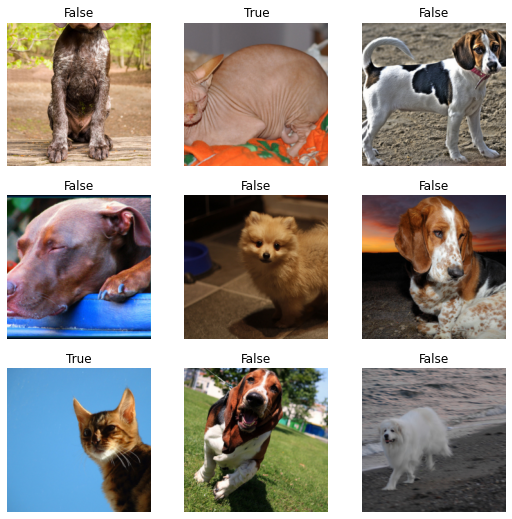

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.148714,0.024055,0.007442,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.045307,0.010911,0.003383,00:34


In [9]:
learn.predict(files[0])

('False', TensorImage(0), TensorImage([9.9971e-01, 2.8843e-04]))

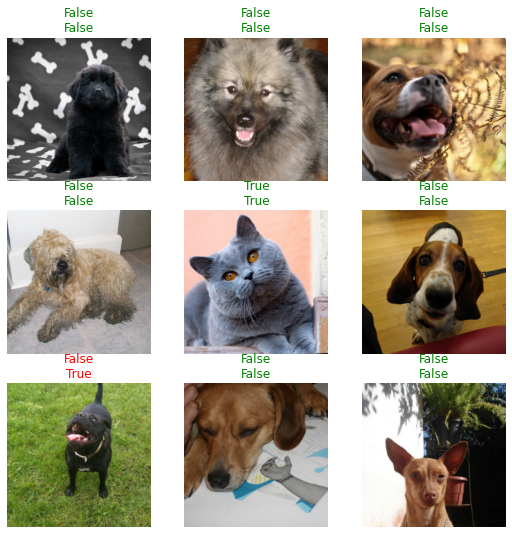

In [10]:
learn.show_results()

# Multi-label Classification

In [15]:
files[0].name

'great_pyrenees_71.jpg'

In [16]:
pat = r'^(.*)_\d+.jpg'

In [17]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

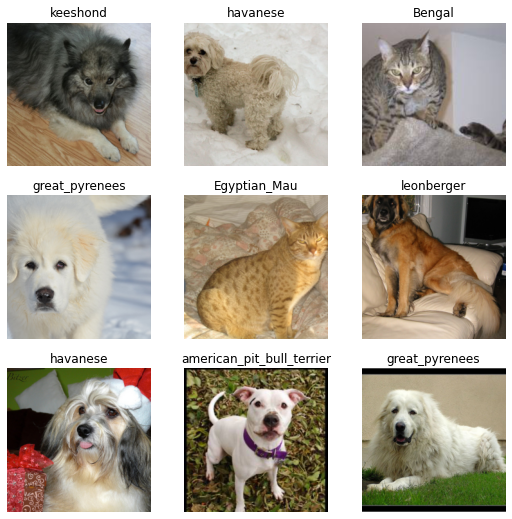

In [18]:
dls.show_batch()

In [19]:
# Dataloaders ( Data Augmentation )

dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

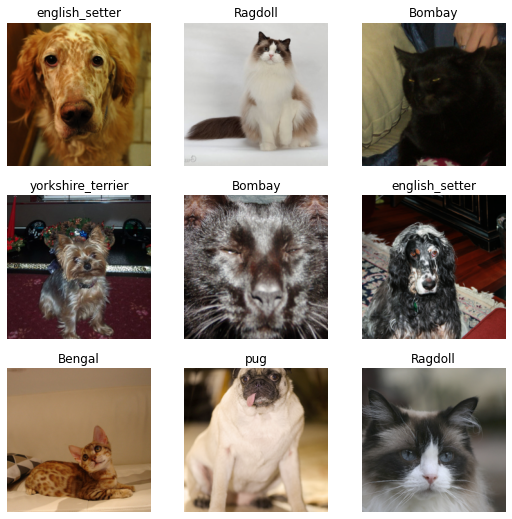

In [20]:
dls.show_batch()

In [21]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

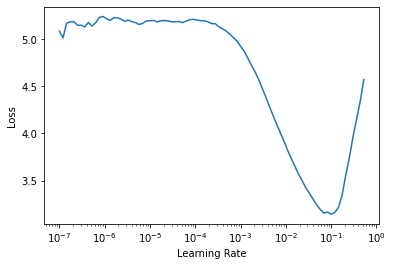

In [22]:
learn.lr_find()

In [23]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.269822,0.329546,0.108254,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.450911,0.435750,0.128552,00:35
1,0.415355,0.418481,0.117727,00:36
2,0.252579,0.256491,0.080514,00:36
3,0.139992,0.228878,0.065629,00:37
